# Import Libraries

In [37]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import folium

import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

from scipy.interpolate import griddata

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle as pkl

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = pd.read_csv(data_path + '/new_Kodangal_gcM.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,w,u,toposheet,in_,f,te,tl,hg,cd,cluster
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,9.414,3.312,0.543,5.819375,...,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0,50.0,3
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,9.853,3.748,0.580,5.819375,...,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0,50.0,3
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.910000,...,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0,50.0,1
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.430000,...,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0,50.0,1
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.990000,...,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,6.0,50.0,1


In [6]:
str_elem = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 
                   'objectid', 
                   'sampleno', 
                   'longitude', 
                   'latitude', 
                   'toposheet']:
        str_elem.append(col)

str_elem_df = str_sed_data[str_elem]

In [7]:
str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,ta,w,u,in_,f,te,tl,hg,cd,cluster
0,44.750,9.414,3.312,0.543,5.819375,1.573,0.073,0.152,1.258,0.129,...,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0,50.0,3
1,45.129,9.853,3.748,0.580,5.819375,1.480,0.109,0.167,1.207,0.080,...,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0,50.0,3
2,58.283,12.534,7.768,1.321,2.910000,1.912,0.192,0.050,0.800,0.061,...,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0,50.0,1
3,61.180,11.670,8.340,1.420,2.430000,1.710,0.180,0.250,0.660,0.080,...,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0,50.0,1
4,60.300,11.470,8.270,1.430,1.990000,1.610,0.170,0.230,0.580,0.060,...,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,6.0,50.0,1


## Concentration of elements in each cluster

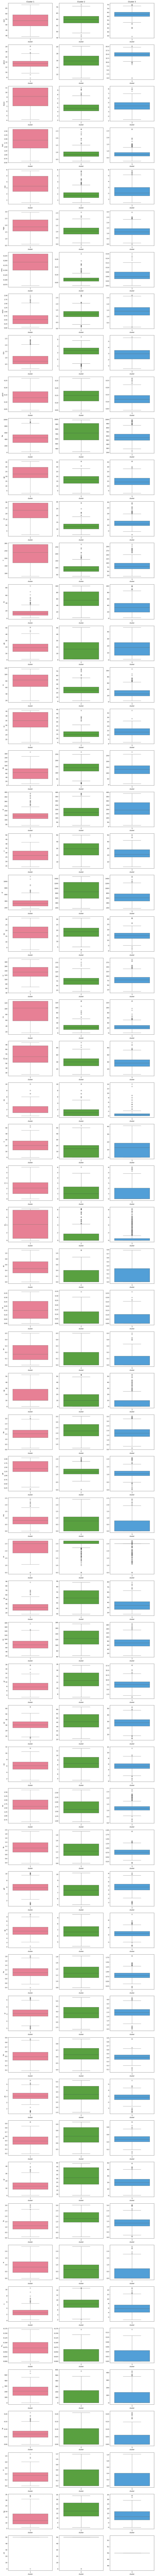

In [8]:
n_elem = len(str_elem_df.columns) - 1
n_clstr = len(str_elem_df['cluster'].unique())
# col_pal = ['#bfeeff', '#a8c5dd', '#a9a2b8', '#a58b91']
col_pal = sns.color_palette("husl", n_clstr)

fig, axes = plt.subplots(nrows=n_elem, 
                         ncols=n_clstr, 
                         figsize=(15, 4 * n_elem))

# If only one row or one column, axes need to be reshaped into a 2D array for consistency in indexing
if n_elem == 1:
    axes = np.expand_dims(axes, 
                          axis=0)
if n_clstr == 1:
    axes = np.expand_dims(axes, 
                          axis=1)

# Loop through each element
for i, element in enumerate(str_elem_df.columns[:-1]):  # assuming the last column is 'cluster'
    for cluster in range(1, n_clstr+1):
        # Filter data for the current cluster
        cluster_data = str_elem_df[str_elem_df['cluster'] == cluster]
        
        # Create boxplot for the current element in the current cluster subplot
        sns.boxplot(x='cluster', 
                    y=element, 
                    data=cluster_data, 
                    ax=axes[i, cluster-1], 
                    palette=[col_pal[cluster-1]])
        
        # Set titles and labels appropriately
        if i == 0:
            axes[i, cluster-1].set_title(f'Cluster {cluster}')
        if cluster == 1:
            axes[i, cluster-1].set_ylabel(element)
        else:
            axes[i, cluster-1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

## Heatmap for dominant elements among clusters

In [9]:
cluster_mean = str_elem_df.groupby('cluster')[str_elem].mean()
cluster_mean.drop(['cluster'], axis=1, inplace=True)

In [10]:
cluster_mean

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,hf,ta,w,u,in_,f,te,tl,hg,cd
cluster,,,,,,,,,,,,,,,,,,,,,
1,53.899417,13.418828,8.921696,1.962861,3.595636,1.984685,0.184607,0.569867,0.893923,0.139166,...,13.853461,1.252758,0.817605,2.724979,0.070607,196.292308,0.065466,0.309013,14.740741,49.815
2,59.879802,15.986679,4.924833,0.963901,1.979018,1.071553,0.072505,1.189082,3.189195,0.152594,...,32.556729,1.903669,0.614702,8.661117,0.032704,114.301024,0.057122,0.307857,19.583333,49.445
3,62.554368,14.918042,4.301822,0.817028,2.392563,1.181628,0.065323,1.423977,2.840363,0.122301,...,20.851477,1.453404,0.368768,5.954070,0.018805,69.565505,0.029499,0.172571,12.365269,50.000


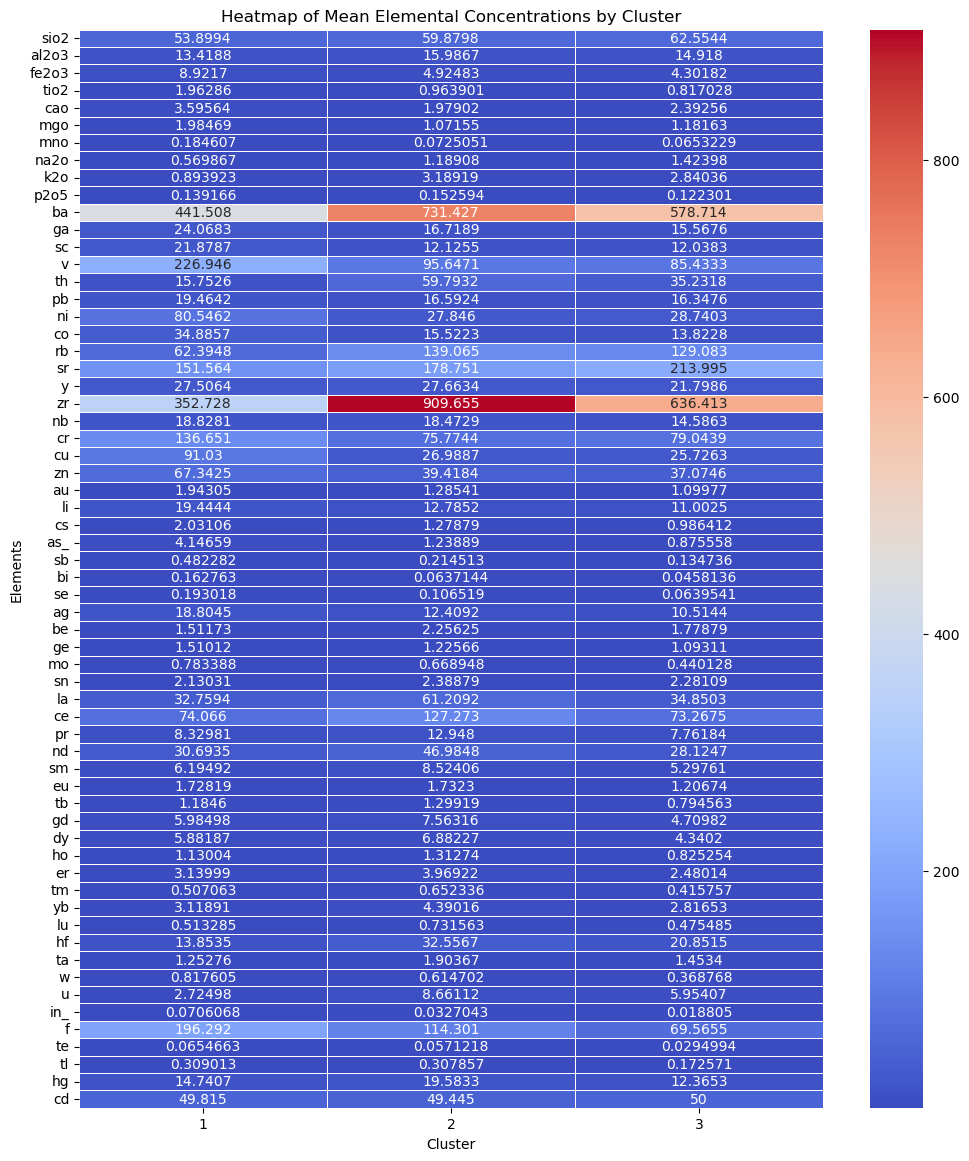

In [11]:
plt.figure(figsize=(12, 14))
heatmap = sns.heatmap(cluster_mean.T, 
                      annot=True, 
                      cmap='coolwarm', 
                      linewidths=.5, 
                      fmt='g')
heatmap.set_title('Heatmap of Mean Elemental Concentrations by Cluster')
heatmap.set_xlabel('Cluster')
heatmap.set_ylabel('Elements')
plt.show()

- Dominant elements in each cluster before handling outliers

In [12]:
elem_clstr_df = pd.DataFrame(columns=['clutser 1', 'clutser 2', 'clutser 3'])
elem_clstr_df.loc[0] = ['Vanadium', np.NaN, 'Strontium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Arsenic', np.NaN, 'Barium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Chromium', np.NaN, 'Zirconium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Nickel', np.NaN, 'Neodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gallium', np.NaN, 'Rubidium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Copper', np.NaN, 'Praseodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Zinc', np.NaN, 'Silver']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Scandium', np.NaN, 'Cerium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Cobalt', np.NaN, 'Thorium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gold', np.NaN, 'Lanthanum']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Mercury', np.NaN, 'Hafnium']

In [13]:
elem_clstr_df

,clutser 1,clutser 2,clutser 3
0,Vanadium,NaN,Strontium
1,Arsenic,NaN,Barium
2,Chromium,NaN,Zirconium
3,Nickel,NaN,Neodymium
4,Gallium,NaN,Rubidium
5,Copper,NaN,Praseodymium
6,Zinc,NaN,Silver
7,Scandium,NaN,Cerium
8,Cobalt,NaN,Thorium
9,Gold,NaN,Lanthanum


In [14]:
clstr1_elem_df = cluster_mean[cluster_mean.index == 0][['v', 'as_', 'cr', 'ni', 'ga', 'cu', 'zn', 'sc', 'co', 'au', 'hg']]
clstr2_elem_df = cluster_mean[cluster_mean.index == 2][['sr', 'ba', 'zr', 'nd', 'rb', 'pr', 'ag', 'ce', 'th', 'la', 'hf']]

In [15]:
clstr1_elem_df

,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg
cluster,,,,,,,,,,,
0,320.131818,20.060909,289.140909,92.231818,18.936364,65.654545,65.3,24.640909,36.727273,20.613636,16.772727


In [16]:
clstr2_elem_df

,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf
cluster,,,,,,,,,,,
2,388.29726,832.106849,842.473973,29.389561,85.875342,7.68695,55.246575,68.574088,19.539726,33.281071,28.702119


In [17]:
clstr1_df = str_sed_data[str_sed_data['cluster'] == 1][['gid', 'longitude', 'latitude'] + list(clstr1_elem_df.columns) + ['cluster']]
clstr1_df.reset_index(inplace=True, drop='index')
clstr1_df.head()

,gid,longitude,latitude,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg,cluster
0,3604,77.509259,14.259009,347.0,24.0,883.0,249.0,20.0,75.0,61.0,26.0,54.0,16.0,15.0,0
1,3605,77.527778,14.259009,500.0,26.0,317.0,105.0,20.0,74.0,92.0,26.0,46.0,20.0,11.0,0
2,3606,77.546296,14.259009,353.0,21.0,357.0,101.0,22.0,56.0,71.0,24.0,41.0,1.5,10.0,0
3,3689,77.509259,14.277027,479.0,24.0,315.0,104.0,26.0,92.0,83.0,29.0,51.0,1.5,35.0,0
4,3690,77.527778,14.277027,382.0,30.0,293.0,81.0,20.0,57.0,77.0,23.0,37.0,1.5,10.0,0


In [18]:
clstr2_df = str_sed_data[str_sed_data['cluster'] == 2][['gid', 'longitude', 'latitude'] + list(clstr2_elem_df.columns) + ['cluster']]
clstr2_df.reset_index(inplace=True, drop='index')
clstr2_df.head()

,gid,longitude,latitude,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf,cluster
0,2947,77.657407,14.475225,375.7,826.5,695.4,31.887143,74.2,8.555444,25,72.232300,16.6,37.722005,26.874492,2
1,2948,77.675926,14.475225,465.2,836.2,826.1,28.995136,73.3,7.586066,24,63.086789,17.0,31.134342,37.079419,2
2,2951,77.731481,14.475225,405.8,770.5,1001.3,25.004000,86.8,6.659000,23,56.014999,23.1,27.639000,26.705000,2
3,2956,77.564815,14.493242,283.4,772.2,453.7,23.953863,63.6,6.265094,137,56.112010,9.8,26.657001,22.014712,2
4,2957,77.583333,14.493242,238.3,591.5,425.9,24.316941,64.8,6.554683,34,60.067221,9.3,29.094922,16.354219,2


## Contour Maps

In [33]:
def plot_contour(df, element, title):

    min_lat_limit = min(df['latitude']) - 0.05
    max_lat_limit = max(df['latitude']) + 0.05
    min_long_limit = min(df['longitude']) - 0.05 
    max_long_limit = max(df['longitude']) + 0.05

    grid_x, grid_y = np.mgrid[
        min_long_limit:max_long_limit:100j,  # 100j specifies 100 points in grid
        min_lat_limit:max_lat_limit:100j
    ]

    # Grid interpolation
    grid_z = griddata(
        (df['longitude'], df['latitude']),
        df[element],
        (grid_x, grid_y),
        method='cubic'  # 'cubic' for smoother contour lines
    )

    cmap = LinearSegmentedColormap.from_list("green_to_red", ["green", "yellow", "red"])
    # Plotting
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(grid_x, 
                      grid_y, 
                      grid_z, 
                      levels=15, 
                      cmap=cmap)  # contour map
    
    plt.colorbar(cp)  # add colorbar
    plt.title(f'{title}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(df['longitude'], 
                df['latitude'], 
                color='blue', 
                label='Sample Points')  # data points
    plt.legend()

    # for i, (x, y) in enumerate(zip(df['longitude'], df['latitude'])):
    #     plt.text(x, y, str(i+1), color='black', fontsize=8)
    
    plt.show()

### Contour map for Gold

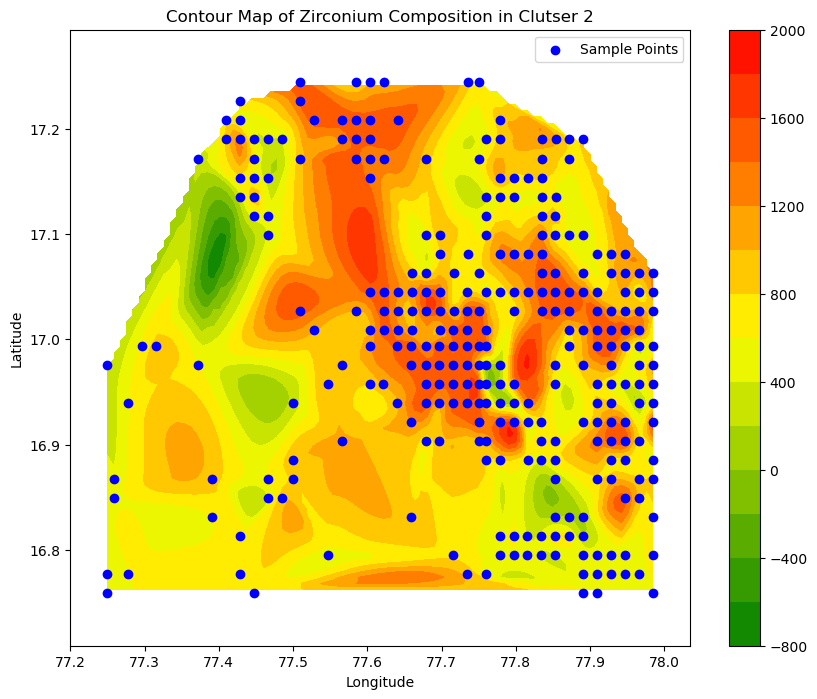

In [34]:
plot_contour(str_sed_data[str_sed_data['cluster'] == 2][['gid', 'longitude', 'latitude'] + ['zr'] + ['cluster']], 
             'zr', 
             'Contour Map of Zirconium Composition in Clutser 2')

## Gold concentration map

In [35]:
clstr1_df = str_sed_data[str_sed_data['cluster'] == 1]

In [45]:
# Plotting using Plotly
fig = px.scatter_mapbox(clstr1_df, lat='latitude', lon='longitude', color='au',
                        size='au', color_continuous_scale=px.colors.sequential.YlOrBr,
                        size_max=15, zoom=10,
                        hover_data={'latitude': False,  # Hide latitude in hover
                                    'longitude': False, # Hide longitude in hover
                                    'au': True,         # Show gold concentration
                                    'gid': True})       # Show sample ID

# Set mapbox style
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=4,
                  mapbox_center = {"lat": clstr1_df['latitude'].mean(), "lon": clstr1_df['longitude'].mean()})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show(renderer='browser')

In [57]:
def concentration_plot(df, elem, title, cb_title):
    # Define color for cluster 1 (you can adjust this as needed)
    color = ['#FFD700']  # Gold color for visualizing gold concentration
    
    marker_size = (df[elem] - df[elem].min()) / (df[elem].max() - df[elem].min()) * 15 + 5  # Ensures minimum size of 5
    
    # Create hover text for each point
    hover_text = [
        f'Latitude: {lat}<br>Longitude: {lon}<br>Sample ID: {gid}<br>Gold Concentration: {element} ppm' 
        for lat, lon, gid, element in zip(df['latitude'], 
                                          df['longitude'], 
                                          df['gid'],
                                          df[elem])
    ]
    
    # Create a trace for cluster 1
    trace = go.Scattermapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        mode='markers',
        marker=dict(
            size=marker_size,
            color=df[elem],  # Assign color based on gold concentration
            colorscale='YlOrBr',  # Yellow-Orange-Brown color scale
            colorbar_title=cb_title,
            showscale=True
        ),
        text=hover_text,
        hoverinfo='text'
    )
    
    # Setting map boundaries based on min and max latitude and longitude
    min_lat_limit = df['latitude'].min() - 1
    max_lat_limit = df['latitude'].max() + 1
    min_long_limit = df['longitude'].min() - 1
    max_long_limit = df['longitude'].max() + 1
    
    # Create layout for the map
    layout = go.Layout(
        title=title,
        hovermode='closest',
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=df['latitude'].mean(),
                lon=df['longitude'].mean()
            ),
            zoom=10,
            bounds=dict(
                south=min_lat_limit,
                north=max_lat_limit,
                west=min_long_limit,
                east=max_long_limit
            )
        ),
        autosize=True
    )
    
    # Create figure object and add trace and layout
    fig = go.Figure(data=[trace], 
                    layout=layout)
    
    fig.update_layout(
        autosize=False,
        width=1300,
        height=1000,
    )
    
    # Display the figure
    fig.show(renderer='browser')

In [63]:
concentration_plot(clstr1_df, 'au', 'Gold Concentration in Cluster 1', 'Gold<br>Concentration<br>(ppm)')

## Zirconium concentration map

In [59]:
clstr2_df = str_sed_data[str_sed_data['cluster'] == 2]

In [64]:
concentration_plot(clstr2_df, 'zr', 'Zirconium Concentration in Cluster 2', 'Zirconium<br>Concentration<br>(ppm)')

## Copper concentration map

In [65]:
concentration_plot(clstr1_df, 'cu', 'Copper Concentration in Cluster 1', 'Copper<br>Concentration<br>(ppm)')

## Lanthanum concentration map

In [66]:
concentration_plot(clstr2_df, 'la', 'Lanthanum Concentration in Cluster 2', 'Lanthanum<br>Concentration<br>(ppm)')